In [3]:
from google.colab import files
uploaded = files.upload()

Saving gutters3.JPG to gutters3.JPG


Enter the integer 1, 2, or 3: 2


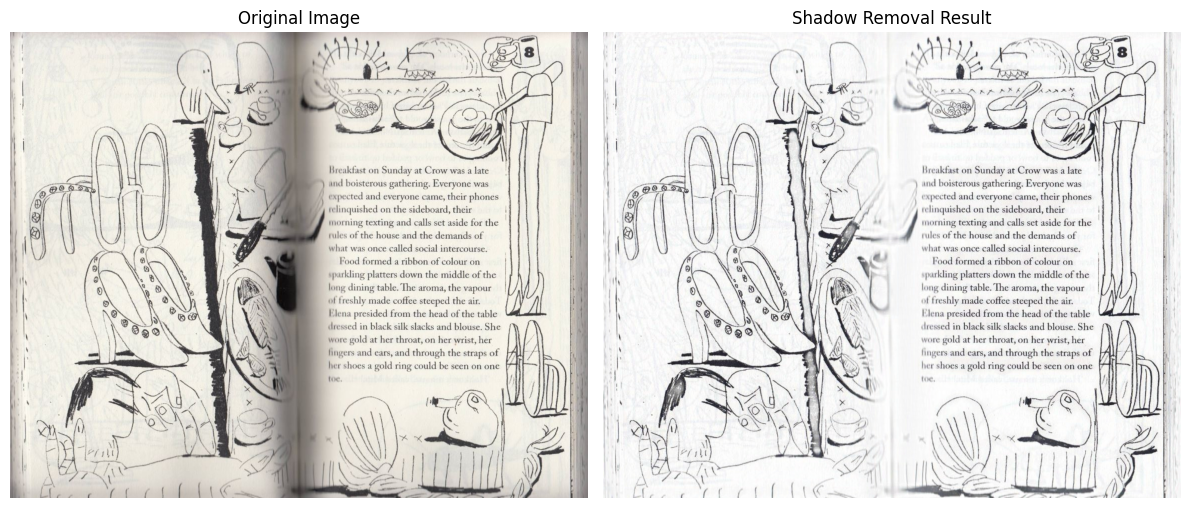

In [11]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_shadows(img_path):
    # Load the image
    img = cv2.imread(img_path, -1)

    # Splitting the image into RGB planes
    rgb_planes = cv2.split(img)

    # Processing each plane to remove shadows
    result_planes = []
    result_norm_planes = []
    for plane in rgb_planes:
        dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
        bg_img = cv2.medianBlur(dilated_img, 21)
        diff_img = 255 - cv2.absdiff(plane, bg_img)
        norm_img = cv2.normalize(diff_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        result_planes.append(diff_img)
        result_norm_planes.append(norm_img)

    # Merging the processed planes back into an image
    result = cv2.merge(result_planes)
    result_norm = cv2.merge(result_norm_planes)

    # Saving the output images
    output_path = img_path.replace('.JPG', '_out.png')
    output_norm_path = img_path.replace('.JPG', '_out_norm.jpg')
    cv2.imwrite(output_path, result)
    cv2.imwrite(output_norm_path, result_norm)

    # Display the original and processed images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=100)  # Adjust dpi value for better resolution
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(cv2.cvtColor(result_norm, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Shadow Removal Result')
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

# Asking user for input
user_input = input("Enter the integer 1, 2, or 3: ")

if user_input == '1':
    img_path = 'gutters1.JPG'
    remove_shadows(img_path)
elif user_input == '2':
    img_path = 'gutters2.JPG'
    remove_shadows(img_path)
elif user_input == '3':
    img_path = 'gutters3.JPG'
    remove_shadows(img_path)
else:
    print("Invalid input. Please enter 1, 2, or 3.")
